In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#data=pd.read_csv('ins.csv')

In [5]:
data=pd.read_csv(r"D:\insurance_data.csv")
data

,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01
...,...,...,...,...,...,...,...,...,...,...
1335,1336,44.0,female,35.5,88,Yes,0,Yes,northwest,55135.40
1336,1337,59.0,female,38.1,120,No,1,Yes,northeast,58571.07
1337,1338,30.0,male,34.5,91,Yes,3,Yes,northwest,60021.40
1338,1339,37.0,male,30.4,106,No,0,Yes,southeast,62592.87


This dataset is of health insurance company in which we are given details about their customers and amount they paid as medical costs for their customer

In [48]:
data.columns

Index(['PatientID', 'age', 'gender', 'bmi', 'bloodpressure', 'diabetic',
       'children', 'smoker', 'region', 'claim'],
      dtype='object')

PROBLEM STATEMENT:
Design a regression model so that we can predict the costs to the company for settling medical bills of their customers based on theirs on characteristics

Life and Health Insurance companies have to invest most in long term investments
they have to maintain some liquidity for near term costs for which they have to choose their investments wisely if we can predict the claims they would have to settle in near future they can invest wisely

In [31]:
data.isna().sum()

PatientID        0
age              5
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64

In [32]:
data.describe()

,PatientID,age,bmi,bloodpressure,children,claim
count,1340.000000,1335.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,670.500000,38.078652,30.668955,94.157463,1.093284,13252.745642
std,386.968991,11.102924,6.106735,11.434712,1.205334,12109.609288
min,1.000000,18.000000,16.000000,80.000000,0.000000,1121.870000
25%,335.750000,29.000000,26.275000,86.000000,0.000000,4719.685000
50%,670.500000,38.000000,30.400000,92.000000,1.000000,9369.615000
75%,1005.250000,47.000000,34.700000,99.000000,2.000000,16604.305000
max,1340.000000,60.000000,53.100000,140.000000,5.000000,63770.430000


In [38]:
data=data.dropna(subset=['region'])

In [42]:
data['age']=data['age'].fillna(np.mean(data.age))

C:\Users\SHIMAN~1\AppData\Local\Temp/ipykernel_21600/3495599247.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['age']=data['age'].fillna(np.mean(data.age))


array([[<AxesSubplot:title={'center':'bmi'}>]], dtype=object)

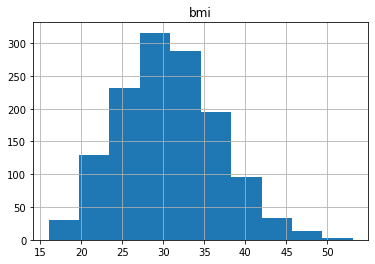

In [54]:
data.hist(['bmi'])

array([[<AxesSubplot:title={'center':'age'}>]], dtype=object)

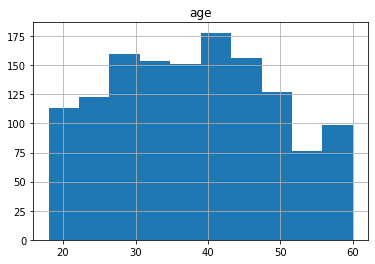

In [55]:
data.hist(['age'])

array([[<AxesSubplot:title={'center':'bloodpressure'}>]], dtype=object)

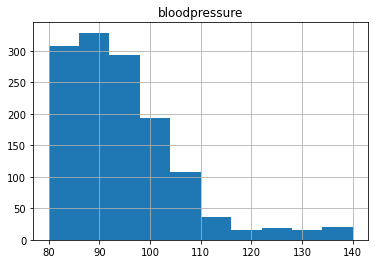

In [56]:
data.hist(['bloodpressure'])

array([[<AxesSubplot:title={'center':'claim'}>]], dtype=object)

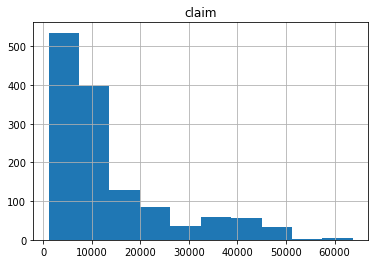

In [89]:
data.hist(['claim'])

<AxesSubplot:>

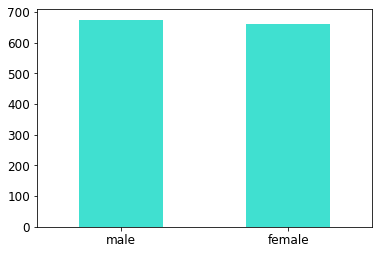

In [60]:
data['gender'].value_counts().plot(kind='bar', figsize=(6,4),color='turquoise', fontsize=12, rot=0)


<AxesSubplot:>

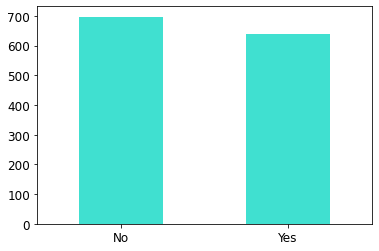

In [86]:
data['diabetic'].value_counts().plot(kind='bar', figsize=(6,4),color='turquoise', fontsize=12, rot=0)


<AxesSubplot:>

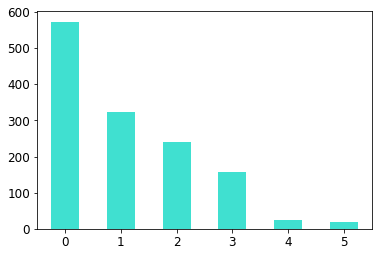

In [80]:
data['children'].value_counts().plot(kind='bar', figsize=(6,4),color='turquoise', fontsize=12, rot=0)

<AxesSubplot:>

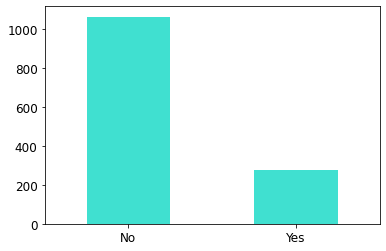

In [84]:
data['smoker'].value_counts().plot(kind='bar', figsize=(6,4),color='turquoise', fontsize=12, rot=0)


<AxesSubplot:>

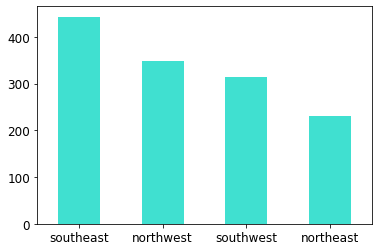

In [82]:
data['region'].value_counts().plot(kind='bar', figsize=(6,4),color='turquoise', fontsize=12, rot=0)

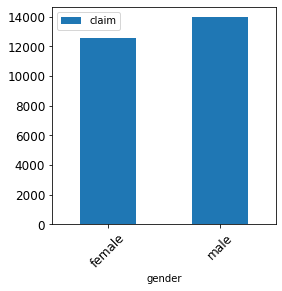

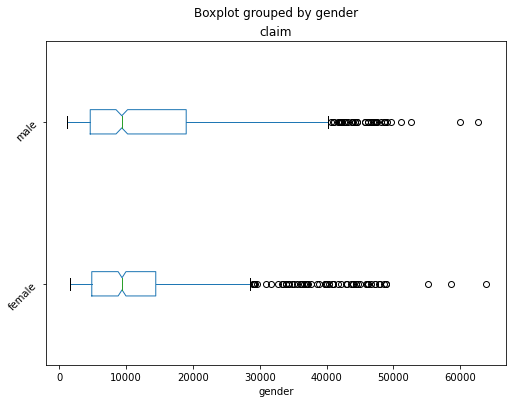

In [75]:
data[['gender','claim']].groupby(['gender']).mean().plot(kind='bar', figsize=(4,4), fontsize=12,rot=45)
plt.show()
data.boxplot(column='claim', notch=True, by='gender',grid=False,figsize=(8,6), rot=45, vert=False)
plt.show()

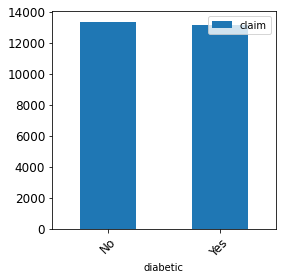

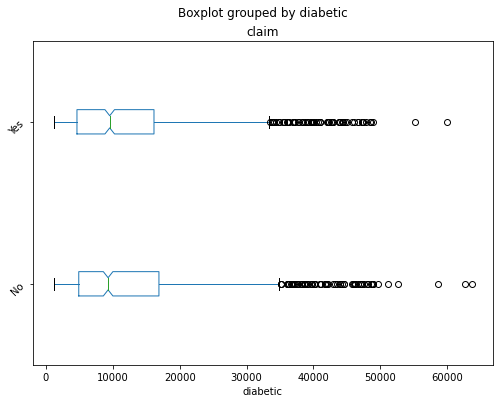

In [87]:
data[['diabetic','claim']].groupby(['diabetic']).mean().plot(kind='bar', figsize=(4,4), fontsize=12,rot=45)
plt.show()
data.boxplot(column='claim', notch=True, by='diabetic',grid=False,figsize=(8,6), rot=45, vert=False)
plt.show()

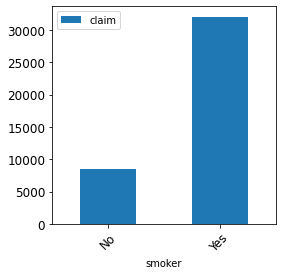

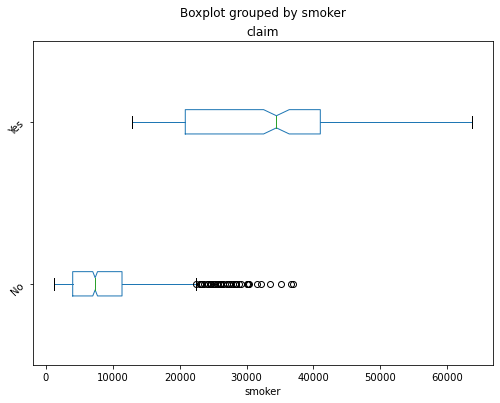

In [85]:
data[['smoker','claim']].groupby(['smoker']).mean().plot(kind='bar', figsize=(4,4), fontsize=12,rot=45)
plt.show()
data.boxplot(column='claim', notch=True, by='smoker',grid=False,figsize=(8,6), rot=45, vert=False)
plt.show()

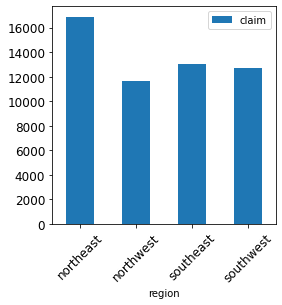

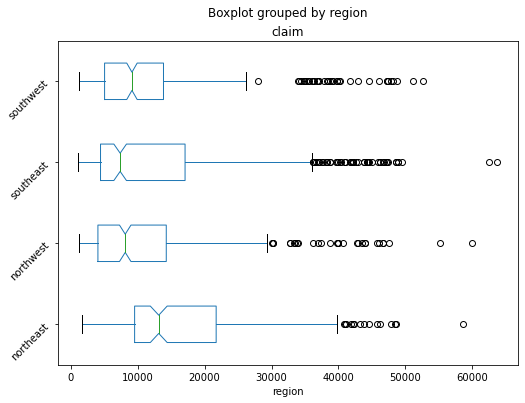

In [83]:
data[['region','claim']].groupby(['region']).mean().plot(kind='bar', figsize=(4,4), fontsize=12,rot=45)
plt.show()
data.boxplot(column='claim', notch=True, by='region',grid=False,figsize=(8,6), rot=45, vert=False)
plt.show()

In [72]:
corr=data.corr()
corr

,PatientID,age,bmi,bloodpressure,children,claim
PatientID,1.000000,-0.008656,0.114410,0.450694,0.125173,0.879304
age,-0.008656,1.000000,-0.042115,-0.060244,-0.026167,-0.028582
bmi,0.114410,-0.042115,1.000000,0.143566,0.011514,0.197000
bloodpressure,0.450694,-0.060244,0.143566,1.000000,-0.032656,0.531339
children,0.125173,-0.026167,0.011514,-0.032656,1.000000,0.067351
claim,0.879304,-0.028582,0.197000,0.531339,0.067351,1.000000
